Latifa Abubakar
Linda Owolabi
Oluchukwu Chiadika
Mary Akinwola
Olajumoke Falowo
Kariman Ibrahim
Nitaranda Alexander
Kehinde Famakinde
Juliana Talai
Juliet Nwaneri

# INTRODUCTION


This data science capstone project is on a dataset that consist of online transactions. The dataset contains information about online payment fraud, so that we can understand what type of transactions lead to fraud.

The project aims to detect online payment fraud with machine learning model and to find the best model suitable for detecting which transactions are fraudulent.


The dataset is  collected from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. It can be found using the link https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection






## PROBLEM STATEMENT


'Determine whether a transaction is fraudulent or not'

# Loading the dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
my_data=pd.read_csv('onlinefraud.csv')
my_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Exploratory Data Analysis and Visualization.

A brief description of the features in the dataset is given below.

|Columns | Description |
| --- | --- |
| Step | represents a unit of time where 1 step equals 1 hour |
| type | type of online transaction |
| amount | the amount of the transaction |
| nameOrig | customer starting the transaction |
| oldbalanceOrg | balance before the transaction |
| newbalanceOrig | balance after the transaction |
| nameDest | recipient of the transaction |
| oldbalanceDest | initial balance of recipient before the transaction|
| newbalanceDest |  the new balance of recipient after the transaction |
| isFraud | fraud transaction |
| isFlaggedFraud | was flagged as fraud |

In [3]:
#information about the dataset
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [4]:
#identifying the number of rows and columns
my_data.shape

(1048575, 11)

In [5]:
#getting the names of the columns
my_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [7]:
#statistics of the data
my_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [8]:
#statistic of the 'object' data
my_data.describe(include='object')

,type,nameOrig,nameDest
count,1048575,1048575,1048575
unique,5,1048317,449635
top,CASH_OUT,C1214450722,C985934102
freq,373641,2,98


In [9]:
#checking for null values
my_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
#checking for duplicates
my_data.duplicated().sum()

0

In [11]:
#checking the type of online transcations mostly used
my_data.type

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
1048570    CASH_OUT
1048571     PAYMENT
1048572     PAYMENT
1048573     PAYMENT
1048574     PAYMENT
Name: type, Length: 1048575, dtype: object

In [12]:
#checking the unique values
my_data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [13]:
#checking the most frequently occuring values
my_data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [14]:
my_data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

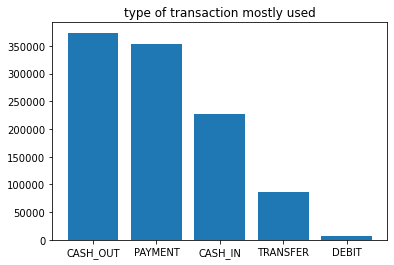

In [15]:
#Plotting a bar chart to show the type of transaction mostly used
x = my_data.type.value_counts().index
h = my_data.type.value_counts().values
plt.bar(x, h)
plt.title('type of transaction mostly used')
plt.show()

This Bar plot helps us to visualize and understand that CASH_OUT has the highest data, this means it is the most transaction type used and likely to have the most fraudulent activities. While Debit is the least transaction type used and least likely to have fraudulent activities.

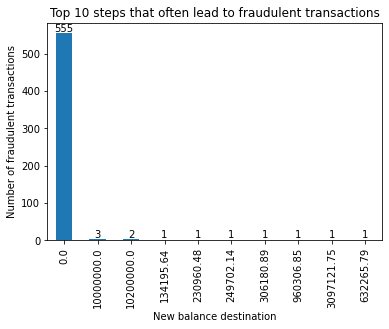

In [16]:
df1 = my_data[my_data['isFraud']==1]
df2 = df1['newbalanceDest'].value_counts().head(10)
ax = df2.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions', fontsize=12)
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('New balance destination')

del ax, df2

Most fraud activities occur between 0 to less than 10000000 in the newbalancedest.

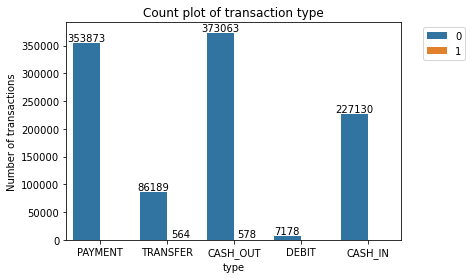

In [17]:
import matplotlib
ax = sns.countplot(x='type', data=my_data, hue='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

del ax

Above confirms that Cashout has the highest fraud activity, then transfer

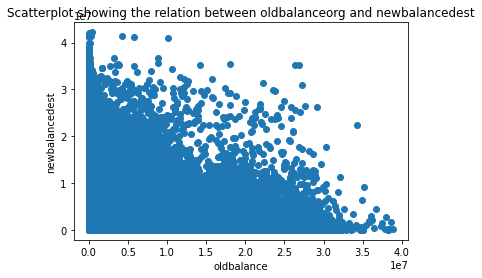

In [18]:
#creating a scatterplot to show further correlation
plt.scatter(my_data.oldbalanceOrg, my_data.newbalanceDest)
plt.xlabel('oldbalance')
plt.ylabel('newbalancedest')
plt.title('Scatterplot showing the relation between oldbalanceorg and newbalancedest')
plt.show()

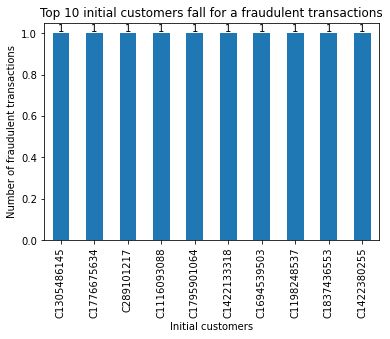

In [19]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions', fontsize=12)
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')

del ax, df2

Initial customers are scammed of at most one for a fraudulent transaction.

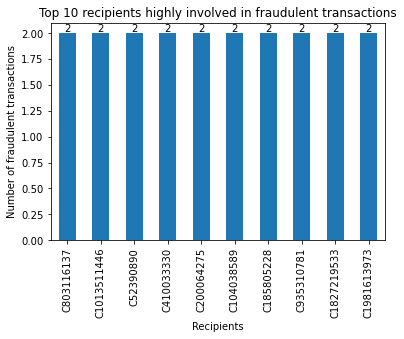

In [20]:
df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions', fontsize=12)
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')

del ax, df2

Suspicious recipients only have a maximum of 2 involved fraudulent transactions.

In [21]:
my_data.isFraud

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [22]:
my_data.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

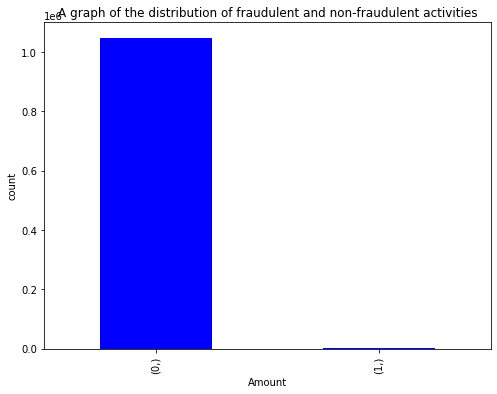

In [23]:
#plotting a barplot to show the distribution of non and fraudulent activity.
frauddata=my_data[['isFraud']].value_counts()
frauddata.plot(kind='bar',
        figsize=(8,6),
        color='blue')
plt.xlabel('Amount')
plt.ylabel('count')
plt.title('A graph of the distribution of fraudulent and non-fraudulent activities')
plt.show()

Text(0.5, 1.0, 'Distribution of transaction amount')

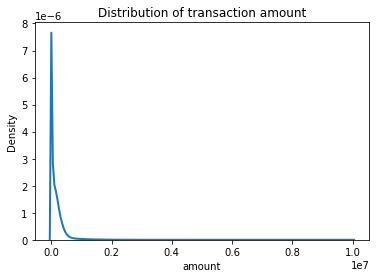

In [24]:
sns.kdeplot(my_data['amount'], linewidth=2)
plt.title('Distribution of transaction amount')

The distribution of transaction amounts is right skewed. This indicates that most values are clustered around the left tail of the distribution, with the longer right tail. (mode < median < mean)

In [25]:
#correlation of the dataset
cor=my_data.corr()
cor

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030,NaN
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862,NaN
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829,NaN
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438,NaN
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552,NaN
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495,NaN
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


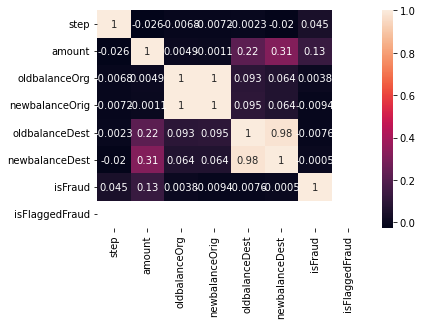

In [26]:
#creating the heatmap showing the correlation
sns.heatmap(cor,annot=True,)
plt.show()

# Data Cleaning.

In [27]:
my_data=my_data.dropna(axis=0)

The dataset does not have null values and there are no duplicate values.

In [28]:
my_data=my_data.drop(['isFlaggedFraud','step'], axis=1)
my_data.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


The dataset requires little cleaning. There were no null values, no duplicated rows and the column 'isFlaggedFraud' and 'step' was dropped. These columns are dropped because it was not necessary for further analysis.

In [29]:
#replacing the type with numbers
my_data["type"] = my_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
my_data.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [30]:
#correlation of the dataset
new_data = my_data[['type', 'amount', 'oldbalanceOrg', 'isFraud']]
cor=new_data.corr()
cor

,type,amount,oldbalanceOrg,isFraud
type,1.000000,0.265263,0.262623,0.014645
amount,0.265263,1.000000,0.004864,0.128862
oldbalanceOrg,0.262623,0.004864,1.000000,0.003829
isFraud,0.014645,0.128862,0.003829,1.000000


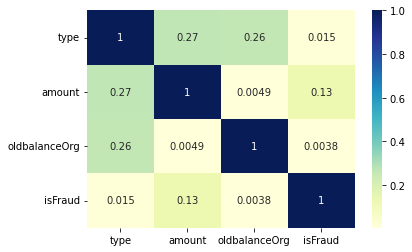

In [31]:
#creating the heatmap showing the correlation
sns.heatmap(cor,cmap="YlGnBu",annot=True)
plt.show()

In [32]:
#Creating a dataset with the relevant positive correlations
data1 = my_data[['type', 'amount', 'oldbalanceOrg', 'isFraud']]
data1.head()

,type,amount,oldbalanceOrg,isFraud
0,2,9839.64,170136.0,0
1,2,1864.28,21249.0,0
2,4,181.00,181.0,1
3,1,181.00,181.0,1
4,2,11668.14,41554.0,0


# Machine Learning.


## Split data into test and train.

In [33]:
#importing model
from sklearn.model_selection import train_test_split

In [34]:
#splitting our data
X = data1[['type', 'amount', 'oldbalanceOrg']].values
print(X[0:5])
y= data1['isFraud'].values
y[0:5]

[[2.000000e+00 9.839640e+03 1.701360e+05]
 [2.000000e+00 1.864280e+03 2.124900e+04]
 [4.000000e+00 1.810000e+02 1.810000e+02]
 [1.000000e+00 1.810000e+02 1.810000e+02]
 [2.000000e+00 1.166814e+04 4.155400e+04]]


array([0, 0, 1, 1, 0], dtype=int64)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(734002, 3) (734002,)
(314573, 3) (314573,)


In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model training and prediction

###  Logistic regression model

In [37]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [38]:
# training model
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
#predicting model
pred=model.predict(X_test)

In [40]:
#model score
model.score(X_test,y_test)

0.9989954636920524

In [41]:
#model evaluation
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, pred)
cm

array([[314231,      9],
       [   307,     26]], dtype=int64)

Text(69.0, 0.5, 'Truth')

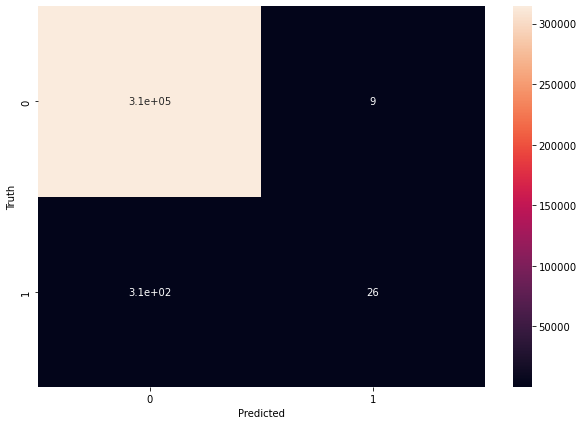

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
#further evaluation with classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314240
           1       0.74      0.08      0.14       333

    accuracy                           1.00    314573
   macro avg       0.87      0.54      0.57    314573
weighted avg       1.00      1.00      1.00    314573



### Support Vector Machine.

In [44]:
#Importing svm
from sklearn import svm

In [45]:
#model training
model1=svm.SVC(kernel='rbf',C=2**32,gamma=0.001)
model1

SVC(C=4294967296, gamma=0.001)

In [46]:
model1.fit(X_train,y_train)

SVC(C=4294967296, gamma=0.001)

In [47]:
#model prediction
svmpred1=model1.predict(X_test)

In [48]:
#model score
model1.score(X_test,y_test)


0.9991861984340678

In [49]:
cm1 = confusion_matrix(y_test, svmpred1)
cm1

array([[314239,      1],
       [   255,     78]], dtype=int64)

Text(69.0, 0.5, 'Truth')

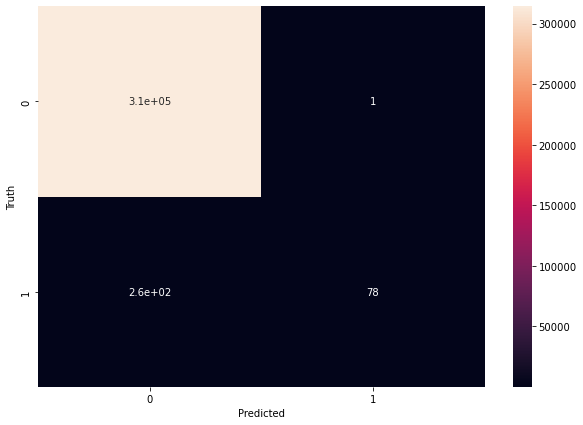

In [50]:
plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
print(classification_report(y_test,svmpred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314240
           1       0.99      0.23      0.38       333

    accuracy                           1.00    314573
   macro avg       0.99      0.62      0.69    314573
weighted avg       1.00      1.00      1.00    314573



### Random Forest 

In [52]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=20, random_state=0, max_depth=6)
model2 = model2.fit(X_train,y_train)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
yRPred = model2.predict(X_test)
print(f"Our new accuracy score on the test data is {round(accuracy_score(y_test,yRPred),8)*100}%")

Our new accuracy score on the test data is 99.913534%


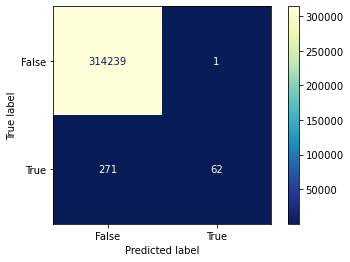

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
confmatrix = confusion_matrix(y_test, yRPred)
cm = ConfusionMatrixDisplay(confmatrix, display_labels=[False, True])
cm.plot(cmap="YlGnBu_r")
plt.show()

### Decision Tree

In [56]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [57]:
decTree = DecisionTreeClassifier(max_depth=3)
decTree

DecisionTreeClassifier(max_depth=3)

In [58]:
#model training
decTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [59]:
#model prediction
predTree = decTree.predict(X_test)

In [60]:
#model evaluation
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9990495052022901


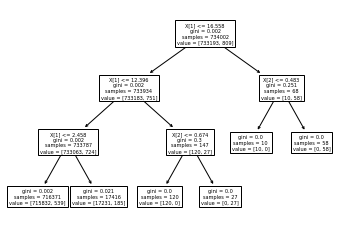

In [61]:
#decision tree plot
tree.plot_tree(decTree)
plt.show()

In [62]:
#creating confusion matrix
cm2=confusion_matrix(y_test,predTree)
cm2


array([[314239,      1],
       [   298,     35]], dtype=int64)

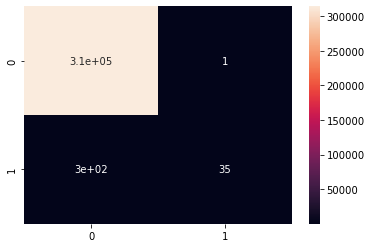

In [63]:
sns.heatmap(cm2,annot=True)
plt.show()

In [64]:
#classification report
print(classification_report(y_test,predTree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314240
           1       0.97      0.11      0.19       333

    accuracy                           1.00    314573
   macro avg       0.99      0.55      0.59    314573
weighted avg       1.00      1.00      1.00    314573



# CONCLUSION

The best model is the support vector machine, but this model can be tune for better prediction.